# WEST Pulses 06/12/2018 (ICRH)

In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: Qt5Agg


In [17]:
from control_room import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# pulses of 06/12/2018
pulses = {53917: {'t_IC_start': 8.15, 't_IC_stop': 8.4},
          53921: {'t_IC_start': 8.15, 't_IC_stop': 8.4}, 
          53923: {'t_IC_start': 8.15, 't_IC_stop': 8.4}, 
          53930: {'t_IC_start': 8.15, 't_IC_stop': 8.4},  
          53931: {'t_IC_start': 8.15, 't_IC_stop': 8.4}, 
          53932: {'t_IC_start': 8.15, 't_IC_stop': 8.38}, 
          53934: {'t_IC_start': 8.15, 't_IC_stop': 8.4}, 
          53935: {'t_IC_start': 8.15, 't_IC_stop': 8.4},
          }

In [4]:
# pulses of 14/11/2018
pulses = {
    53630: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53632: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53633: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53636: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53637: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    #53638: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53639: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53640: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53643: {'t_IC_start': 6.0, 't_IC_stop': 6.6},
    53677: {'t_IC_start': 5.6, 't_IC_stop': 6.4}
}
dt = 0.5  # s

C:\Users\JH218595\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


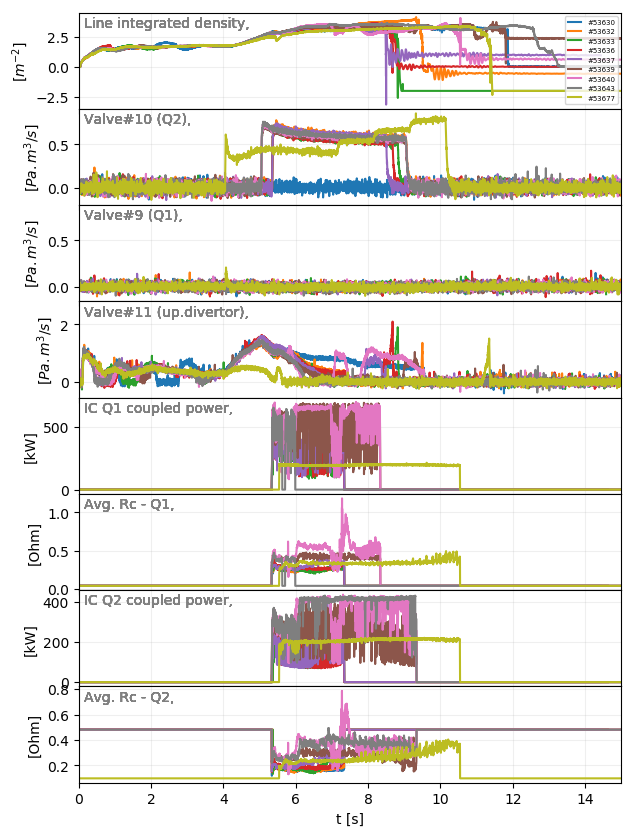

In [5]:
# Density, Gas flow#10, P_IC and Rc for all the 
sigs = [signals['nl'],
        signals['Valve10'],
        signals['Valve9'],
        signals['Valve11'],
        signals['IC_P_Q1'], 
        signals['IC_Rc_Q1_avg'],
        signals['IC_P_Q2'], 
        signals['IC_Rc_Q2_avg'],        
        ]

fig, axes = scope(pulses.keys(), sigs, do_smooth=False)
axes[-1].set_xlim(0, 15)
axes[0].legend(fontsize=5)

In [ ]:
# looking in details: how behave the gas flow before IC? What impact of the gas flow on coupling? 
Rc_Q1, Rc_Q2, V10 = [], [], []
for pulse in pulses.keys():
    y_Rc, t_Rc = get_sig(pulse, signals['IC_Rc_Q2_avg'], do_smooth=True)
    y_Rc, t_Rc = in_between(y_Rc, t_Rc, 
                            t_start=pulses[pulse]['t_IC_start'], 
                            t_end=pulses[pulse]['t_IC_stop'])

    Rc_Q2.append([np.amin(y_Rc), np.mean(y_Rc), np.amax(y_Rc)])

    y_V10, t_V10 = get_sig(pulse, signals['Valve10'], do_smooth=True)
    y_V10, t_V10 = in_between(y_V10, t_V10, 
                              t_start=pulses[pulse]['t_IC_start'] - dt, 
                              t_end=pulses[pulse]['t_IC_start'])

    V10.append([np.amin(y_V10), np.mean(y_V10), np.amax(y_V10)])

    y_LH, t_LH = get_sig(pulse, signals['LH_P_tot'], do_smooth=True)
    y_LH, t_LH = in_between(y_LH, t_LH, 
                            t_start=pulses[pulse]['t_IC_start'], 
                            t_end=pulses[pulse]['t_IC_stop'])

    P_LH.append([np.amin(y_LH), np.mean(y_LH), np.amax(y_LH)])

Rc_Q1 = np.array(Rc_Q1)
Rc_Q2 = np.array(Rc_Q2)

V10 = np.array(V10)

In [ ]:
# Rc vs gas flow
fig, ax = plt.subplots()
yerr = np.abs(Rc_Q2[:,1] - Rc_Q2[:,(0,2)].T)
xerr = np.abs(V10[:,1] - V10[:,(0,2)].T)

ax.errorbar(x=V10[:,1], y=Rc_Q2[:,1], 
            xerr=xerr, yerr=yerr,
            ls='', marker='.', ms=20, alpha=0.6)
ax.set_xlabel('Valve#10 Flow rate [Pa.m3/s]', fontsize=12)
ax.set_ylabel('Coupling resistance (with LH) [$\Omega$]', fontsize=12)      
ax.grid(True)  
ax.set_title(f'Flow rate averaged during {dt} s before IC \n {list(pulses.keys())}', fontsize=12)

for (idx, pulse) in enumerate(pulses.keys()):
    ax.text(x=V10[idx,1], y=Rc_Q2[idx,1], s=f'{pulse}')
    
#plt.savefig('WEST_C3b_2018-11-14_ICRH_Q2_Rc-vs-Valve10.png', dpi=150)

In [ ]:
# Rc vs P_LH
fig, ax = plt.subplots()
yerr = np.abs(Rc_Q2[:,1] - Rc_Q2[:,(0,2)].T)
xerr = np.abs(P_LH[:,1] - P_LH[:,(0,2)].T)

ax.errorbar(x=P_LH[:,1], y=Rc[:,1], 
            xerr=xerr, yerr=yerr,
            ls='', marker='.', ms=20, alpha=0.6)
ax.set_xlabel('Total LH Power [MW]', fontsize=12)
ax.set_ylabel('Coupling resistance (with LH) [$\Omega$]', fontsize=12)      
ax.grid(True)  
ax.set_title(f'{list(pulses.keys())}', fontsize=12)

for (idx, pulse) in enumerate(pulses.keys()):
    ax.text(x=P_LH[idx,1], y=Rc[idx,1], s=f'{pulse}')